# **Heart Disease Prediction**

## **Introduction**

Heart failure is a common form of cardiovascular heart disease that can lead to numerous complications, often fatal. The ability to predict, with reasonable accuracy, whether a patient is experiencing an undiagnosed heart disease is an extremely volatile procedure in modern healthcare. The objective of this project is to use a classification model and predict whether or not an individual currently has heart disease based on various health and physical attributes.

**Question:** Will an individual have a heart disease based on their age, number of colored vessels, and old peak values?

Age, Colored Vessels and Old Peak values were chosen as predictors because they generated the highest number of accuracy. As a result, they are used to find the K values for this classification model. The method for finding these predictors is later explained in Methods & Results: Data Analysis Section. 

The dataset used in this project is a combination of four publicly available heart disease datasets on archive.ics.uci.edu; namely, Processed Cleveland Data, Processed VA Data, Processed Switzerland Data, and Processed Hungary Data. The datasets were combined in R to generate a larger, cross-continent dataframe which includes a total of 920 observations with 15 attribute columns. It describes and utilises 14 common biological characteristics to predict the probability of an existing heart disease in patients.


#### **Libraries**

In [179]:
library(tidyverse)
library(tidymodels)
library(dplyr, warn.conflicts = FALSE)
library(repr)
library(GGally) 
library(ISLR)
library(RColorBrewer)
library(cowplot)
library(gridExtra) 
library(stringr) 
set.seed(7777)
options(repr.matrix.max.rows = 6)

#### **Loading & Reading The Data** 

In [180]:
set.seed(7777)

cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod"
cleveland_data <- read_delim(cleveland_url, delim = " ", col_names = FALSE, skip = 19)
print("Table 1")
cleveland_data

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)



[1] "Table 1"


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
63,male,angina,145.0,233,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
67,male,asympt,160.0,286,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
67,male,asympt,120.0,229,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,male,notang,118.0,149,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
74,fem,abnang,120.0,269,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H
54,fem,notang,160.0,201,fal,norm,163.0,fal,0.0,up,1.0,norm,buff,H


#### **Wangle and Clean The Dataset**

In [181]:
set.seed(7777)

colnames(cleveland_data) <- c("age", "sex", "chest_pain_type", "resting_bp", "cholestrol", 
                              "fasting_bs", "resting_ecg", "max_hr", "exercise_angina", "oldpeak",
                              "st_slope", "colored_vessels", "thal", "heart_disease", "sickness_level") 

cleveland_mutate <- cleveland_data %>%
                        mutate(max_hr = as.numeric(cleveland_data$max_hr)) %>% 
                        mutate(resting_bp = as.numeric(cleveland_data$resting_bp)) %>%
                        mutate(oldpeak = as.numeric(cleveland_data$oldpeak)) %>%
                        mutate(sex = as.factor(cleveland_data$sex)) %>% 
                        mutate(chest_pain_type = as.factor(cleveland_data$chest_pain_type)) %>%
                        mutate(resting_ecg = as.factor(cleveland_data$resting_ecg)) %>%
                        mutate(heart_disease = as.factor(cleveland_data$heart_disease)) %>%
                        mutate(exercise_angina = as.factor(cleveland_data$exercise_angina)) %>%
                        mutate(st_slope = as.factor(cleveland_data$st_slope)) %>%
                        mutate(thal = as.factor(cleveland_data$thal)) %>%
                        mutate(sickness_level = as.factor(cleveland_data$sickness_level)) %>%
                        mutate(colored_vessels = as.numeric(cleveland_data$colored_vessels)) %>% 
                        mutate(fasting_bs = as.factor(cleveland_data$fasting_bs)) 

cleveland_clean_data <- na.omit(cleveland_mutate)
print("Table 2")
cleveland_clean_data


Warning message:
“Problem with `mutate()` input `colored_vessels`.
ℹ NAs introduced by coercion
ℹ Input `colored_vessels` is `as.numeric(cleveland_data$colored_vessels)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


[1] "Table 2"


age,sex,chest_pain_type,resting_bp,cholestrol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,colored_vessels,thal,heart_disease,sickness_level
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>
63,male,angina,145,233,true,hyp,150,fal,2.3,down,0,fix,buff,H
67,male,asympt,160,286,fal,hyp,108,true,1.5,flat,3,norm,sick,S2
67,male,asympt,120,229,fal,hyp,129,true,2.6,flat,2,rev,sick,S1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,male,notang,118,149,fal,hyp,126,fal,0.8,up,3,norm,sick,S1
74,fem,abnang,120,269,fal,hyp,121,true,0.2,up,1,norm,buff,H
54,fem,notang,160,201,fal,norm,163,fal,0.0,up,1,norm,buff,H


In [182]:
levels(cleveland_clean_data$heart_disease)

[1] " buff" " sick" "buff"  "sick"

In [183]:
set.seed(7777)

type=factor(sample(c("buff","sick","buff","sick"),20,replace=TRUE))
print("Table 3")

table(cleveland_clean_data$heart_disease)
levels(cleveland_clean_data$heart_disease) = list( sick = "sick", buff = "buff")

[1] "Table 3"



 buff  sick  buff  sick 
    1     1   160   136 

In [184]:
set.seed(7777)

type=factor(sample(c("buff","sick","buff","sick"),20,replace=TRUE))
print("Table 4")

table(cleveland_clean_data$heart_disease)
levels(cleveland_clean_data$heart_disease) = list( sick = "sick", buff = "buff")
levels(cleveland_clean_data$heart_disease)

cleveland_clean <- na.omit(cleveland_clean_data) # takes out the na's

[1] "Table 4"



sick buff 
 136  160 

[1] "sick" "buff"

####  **Data Summary**

In [185]:
set.seed(7777)

cleveland_select <- select(cleveland_clean, heart_disease, sex, age, oldpeak, max_hr, resting_bp, age, cholestrol, colored_vessels)
cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = heart_disease)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

print("Table 5")
summary(cleveland_train)

[1] "Table 5"


 heart_disease   sex           age           oldpeak          max_hr     
 sick:102       fem: 75   Min.   :29.00   Min.   :0.000   Min.   : 71.0  
 buff:120      male:147   1st Qu.:47.25   1st Qu.:0.000   1st Qu.:136.0  
                          Median :55.50   Median :0.800   Median :152.5  
                          Mean   :54.32   Mean   :1.055   Mean   :149.9  
                          3rd Qu.:61.00   3rd Qu.:1.600   3rd Qu.:165.0  
                          Max.   :77.00   Max.   :6.200   Max.   :202.0  
   resting_bp      cholestrol    colored_vessels 
 Min.   : 94.0   Min.   :157.0   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:212.0   1st Qu.:0.0000  
 Median :130.0   Median :243.0   Median :0.0000  
 Mean   :131.4   Mean   :248.8   Mean   :0.6126  
 3rd Qu.:140.0   3rd Qu.:277.0   3rd Qu.:1.0000  
 Max.   :200.0   Max.   :564.0   Max.   :3.0000  

####  **Visualization for Exploratory Data Analysis**

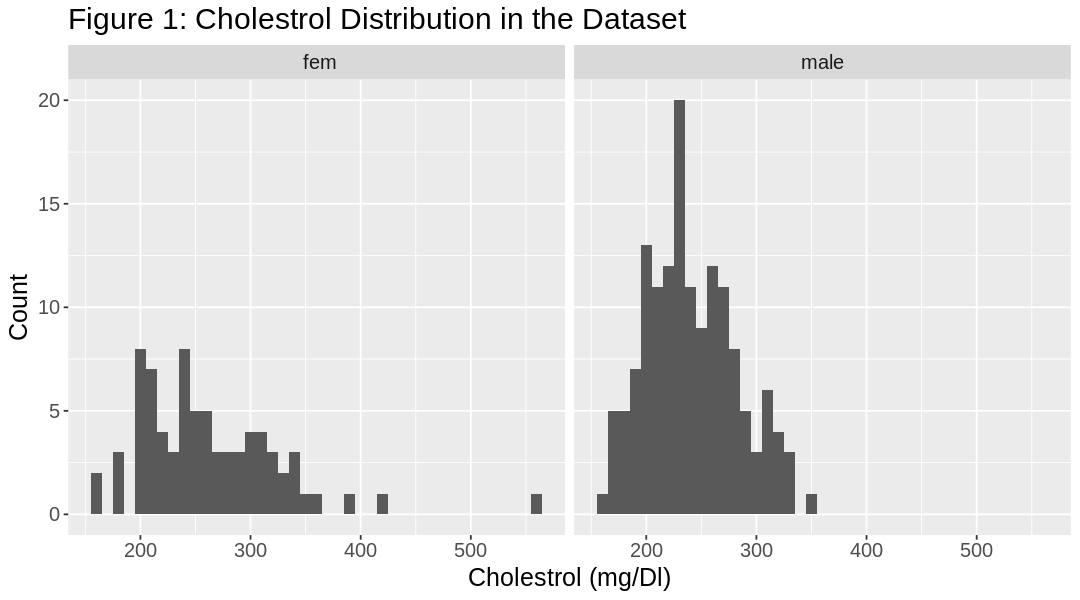

In [186]:
set.seed(7777)

# cholestrol distribution
cholestrol_dist <- cleveland_train %>%
                    ggplot(aes(x = cholestrol)) +
                        geom_histogram(binwidth = 10) +
                        labs(x = "Cholestrol (mg/Dl)", title = "Figure 1: Cholestrol Distribution in the Dataset", y = "Count") +
                        facet_grid(cols = vars(sex))+
                        theme(text = element_text(size = 15))

options(repr.plot.width = 9, repr.plot.height = 5)
cholestrol_dist

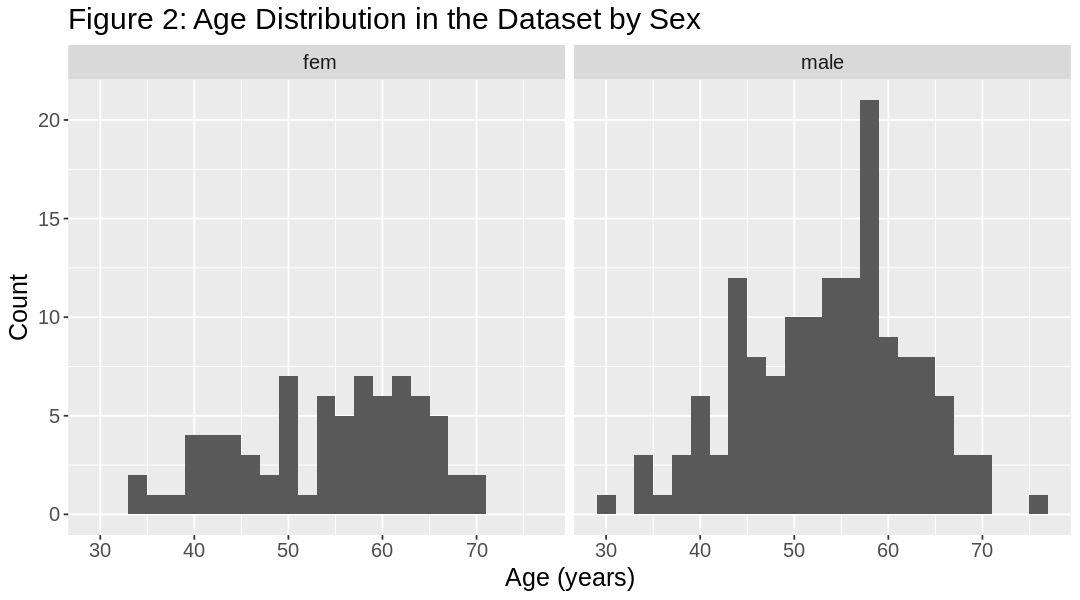

In [187]:
set.seed(7777)

# age distribution in the dataset
age_dist <- cleveland_train %>%
                    ggplot(aes(x = age)) +
                        geom_histogram(binwidth = 2) +
                        labs(x = "Age (years)", title = "Figure 2: Age Distribution in the Dataset by Sex", y = "Count") +
                        facet_grid(cols = vars(sex))+
                        theme(text = element_text(size = 15))

options(repr.plot.width = 9, repr.plot.height = 5)
age_dist

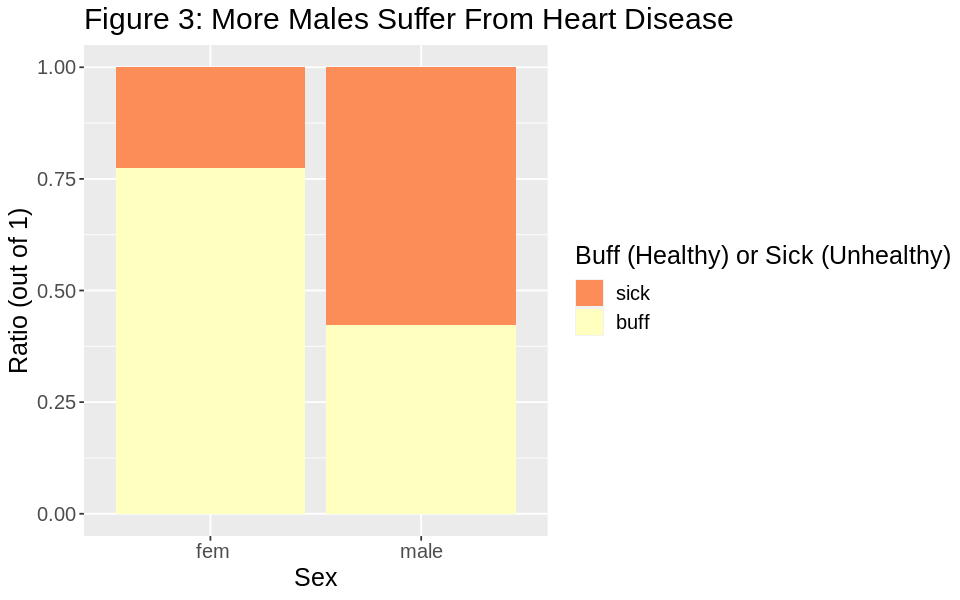

In [188]:
set.seed(7777)

# ratio of prevelance of heart disease in males vs females
heartdis_by_sex_dist <- cleveland_train %>%
                            ggplot(aes(x = sex, fill = heart_disease)) + 
                                geom_bar(position = 'fill') + 
                                xlab("Sex") +
                                ylab("Ratio (out of 1)") +
                                labs(fill = "Buff (Healthy) or Sick (Unhealthy)") +
                                ggtitle("Figure 3: More Males Suffer From Heart Disease") +
                                scale_fill_brewer(palette = "Spectral")+
                                theme(text = element_text(size = 15))

options(repr.plot.width = 8, repr.plot.height = 5)
heartdis_by_sex_dist

####  **Data Analysis & Analysis Visualization**

In [189]:
set.seed(7777)

names <- colnames(cleveland_train %>% select(-heart_disease, -sex))

accuracies <- tibble(size = integer(),
            model_string = character(), 
            accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

heart_vfold <- vfold_cv(cleveland_train, v = 5, strata = heart_disease)

n_total <- length(names)

selected <- c()
print("Table 6")
for (i in 1:n_total) {
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        preds_new <- c(selected, names[[j]])
        model_string <- paste("heart_disease", "~", paste(preds_new, collapse="+"))

        heart_recipe <- recipe(as.formula(model_string), 
                                data = cleveland_train) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        acc <- workflow() %>%
          add_recipe(heart_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>%
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies


[1] "Table 6"


size,model_string,accuracy
<int>,<chr>,<dbl>
1,heart_disease ~ colored_vessels,0.7115152
2,heart_disease ~ colored_vessels+oldpeak,0.7118182
3,heart_disease ~ colored_vessels+oldpeak+cholestrol,0.7657576
4,heart_disease ~ colored_vessels+oldpeak+cholestrol+age,0.7570707
5,heart_disease ~ colored_vessels+oldpeak+cholestrol+age+max_hr,0.7524242
6,heart_disease ~ colored_vessels+oldpeak+cholestrol+age+max_hr+resting_bp,0.7387879


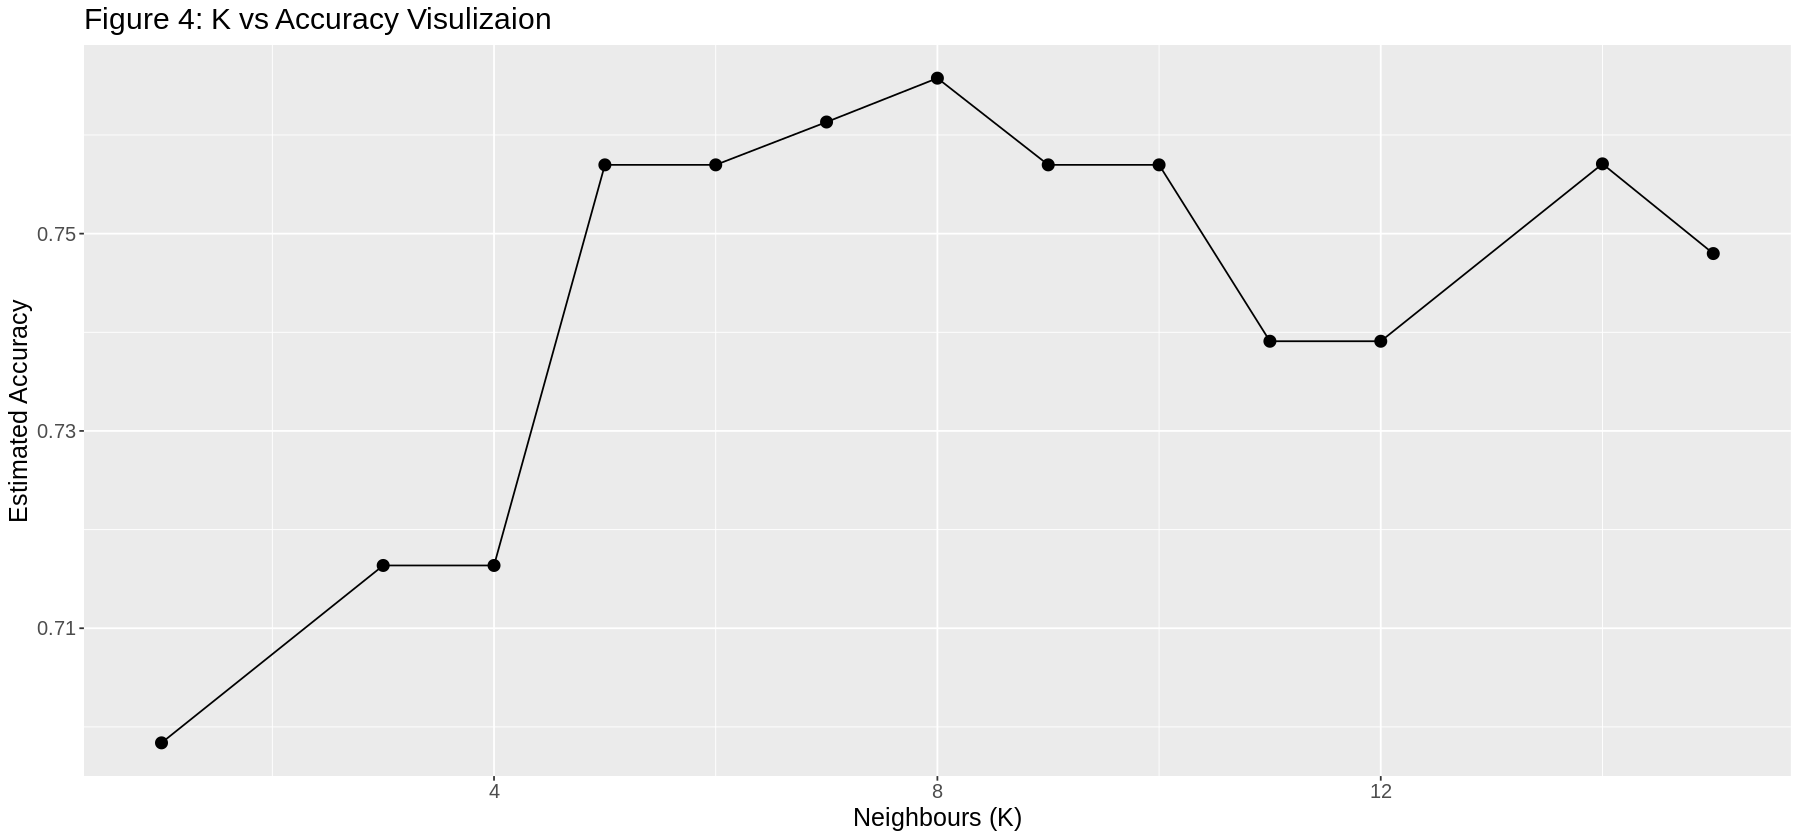

In [190]:
set.seed(7777)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
                    set_engine("kknn") %>%
                    set_mode("classification")

knn_recipe <- recipe(heart_disease ~ colored_vessels+oldpeak+cholestrol , data = cleveland_train) %>%
                    step_center(all_predictors()) %>%
                    step_scale(all_predictors())

vfold_metrics <- workflow() %>%
                    add_recipe(knn_recipe) %>%
                    add_model(knn_tune) %>%
                    tune_grid(resamples = heart_vfold, grid = 15) %>% 
                    collect_metrics()

accuracy <- filter(vfold_metrics, .metric == "accuracy")

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) + 
                  geom_point(size = 3) +
                  geom_line() +
                  ggtitle("Figure 4: K vs Accuracy Visulizaion")+
                  labs(x = "Neighbours (K)", y = "Estimated Accuracy") +
                  theme(text = element_text(size = 15))

options(repr.plot.width = 15, repr.plot.height = 7)
cross_val_plot


In [191]:
set.seed(7777)
print("Table 7")
bestK <- vfold_metrics %>%
            filter(.metric == "accuracy") %>%
            filter(mean == max(mean)) %>%
            head(1) %>%
            select(neighbors)
bestK

[1] "Table 7"


neighbors
<int>
8


In [192]:
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) %>%   # model specification
                set_engine("kknn") %>%
                set_mode("classification")

final_fit <- workflow() %>%                     
                add_recipe(knn_recipe) %>%
                add_model(final_spec) %>%
                fit(data = cleveland_train)

heart_predictions <- predict(final_fit, cleveland_test) %>%
                bind_cols(cleveland_test)

heart_metrics <- heart_predictions %>%
                metrics(truth = heart_disease, estimate = .pred_class)
print("Table 8")
heart_metrics

[1] "Table 8"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8243243
kap,binary,0.6471020


In [193]:
print("Table 9")
conf_mat <- heart_predictions %>%
                        conf_mat(truth = heart_disease, estimate = .pred_class)
conf_mat

[1] "Table 9"


          Truth
Prediction sick buff
      sick   28    7
      buff    6   33

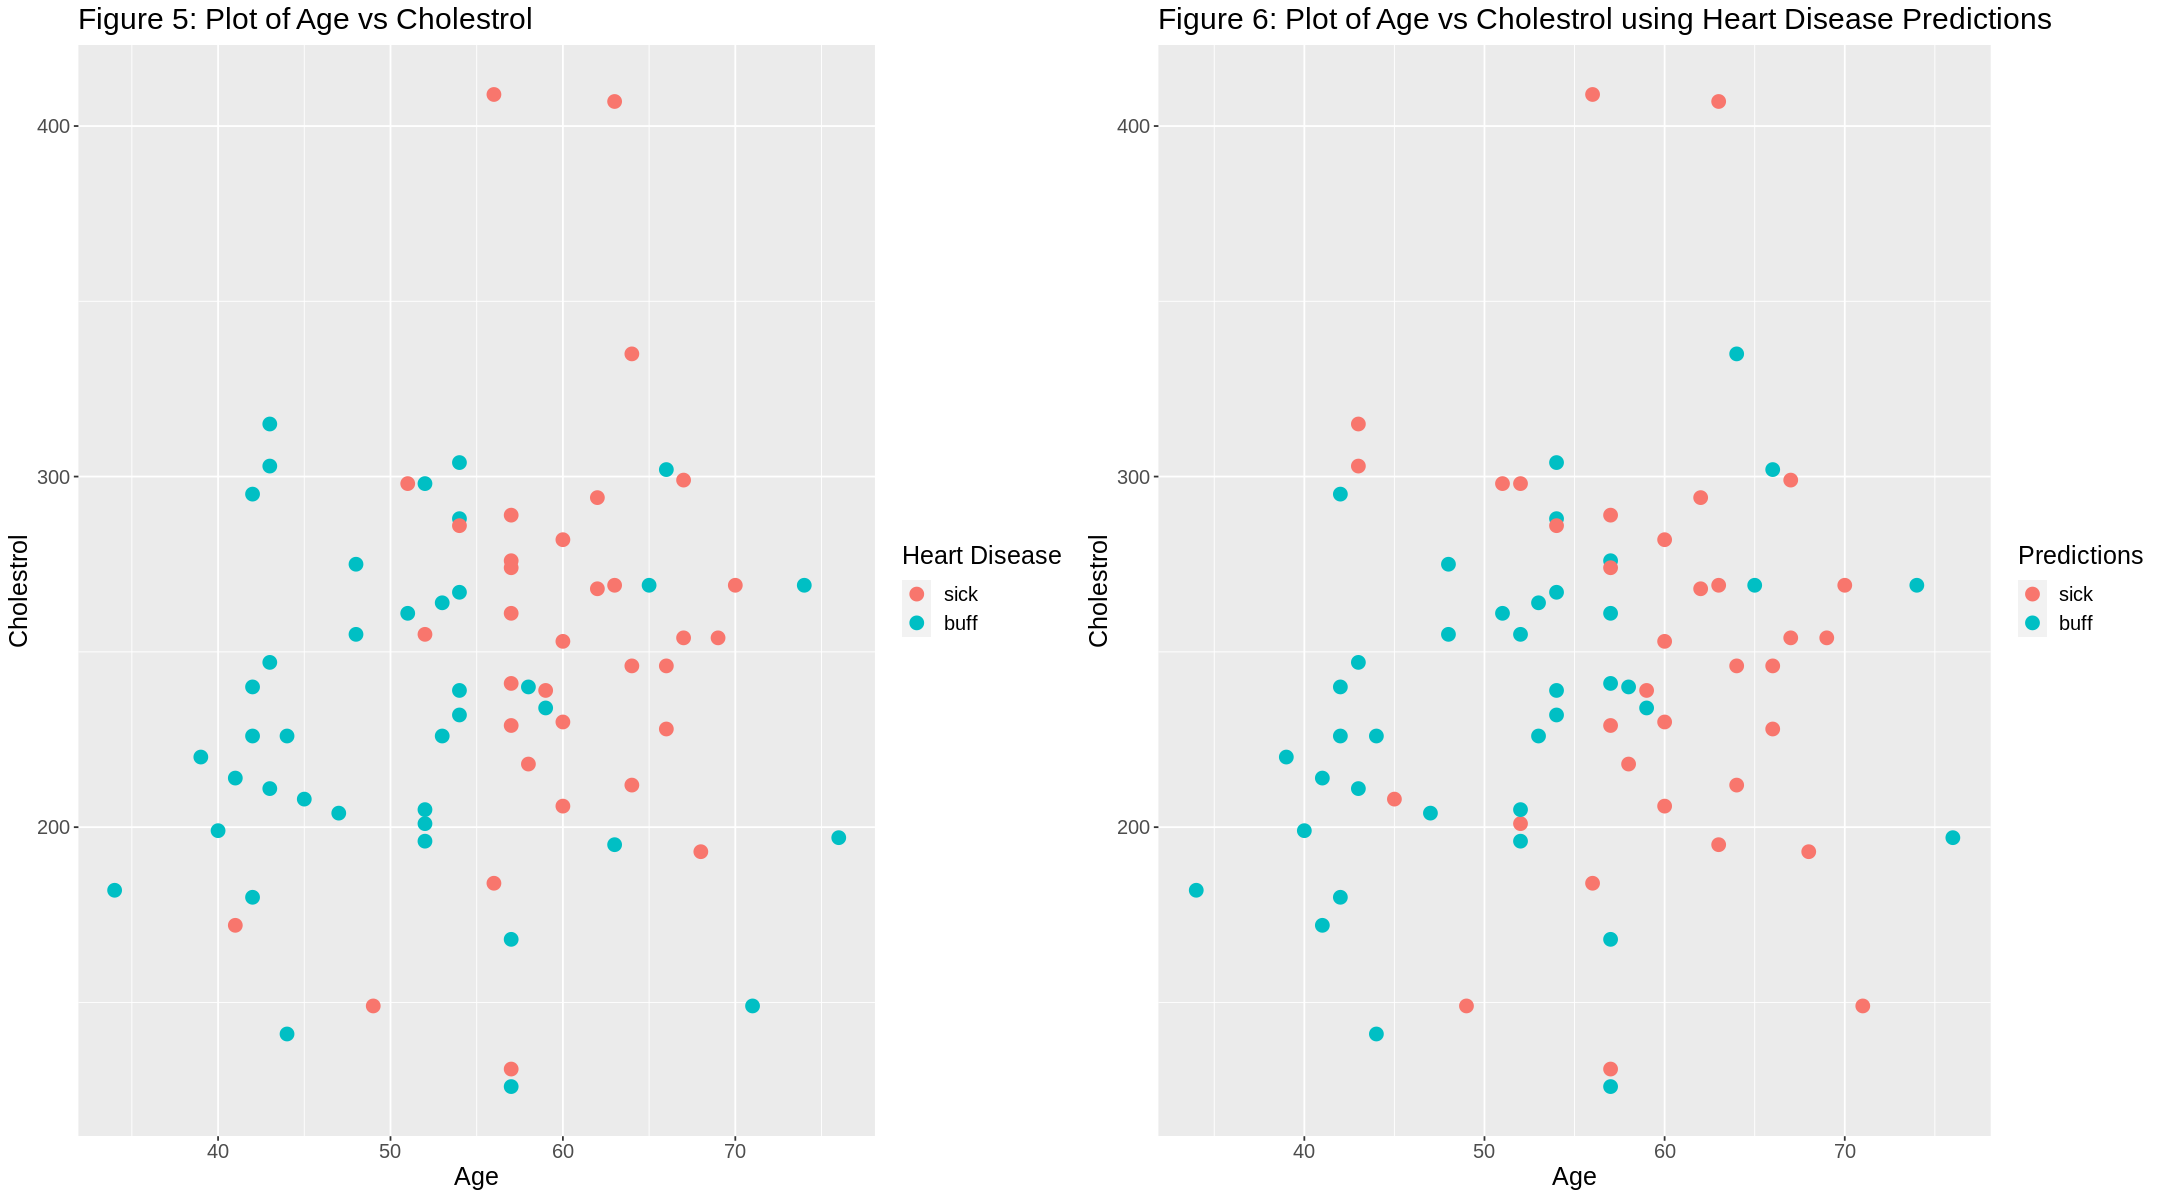

In [194]:
#visualizing age vs max_hr using heart_disease factors
options(repr.plot.width = 18, repr.plot.height = 10)
hr_vs_age_plot1 <- cleveland_test %>%
                        ggplot(aes(x = age, y = cholestrol, color = heart_disease))+
                            geom_point(size = 3.5) +
                            labs(title = "Figure 5: Plot of Age vs Cholestrol", x = "Age",
                                 y = "Cholestrol", color = "Heart Disease")+
                            theme(text = element_text(size = 15))

#visualizing age vs max_hr using heart_disease factors
hr_vs_age_plot2 <- heart_predictions %>%
                        ggplot(aes(x = age, y = cholestrol, color = .pred_class))+
                            geom_point(size = 3.5) +
                            labs(title = "Figure 6: Plot of Age vs Cholestrol using Heart Disease Predictions", x = "Age",
                                 y = "Cholestrol", color = "Predictions")+
                             theme(text = element_text(size = 15))
                                

plot_grid(hr_vs_age_plot1, hr_vs_age_plot2)

## **Methods & Results**

A classification model will be used to determine whether or not the individual has heart disease based on the variables **Colored Vessels, Age and Old Peak Values** as predictors. Through these variables, the model will be able to determine and predict whether or not the patient has heart disease due to its correlation with the patient's health.A scatterplot visualization comparison of the predictions of patients with heart disease will then be plotted. 

**What are the predictors?** <span style="color:green">age</span> is measured in years and ranges between 28 and 77. <span style="color:green">old_peak</span> values represent the measured depression of the ST wave which range from -2.6 to 6.2. <span style="color:green">colored_vessels</span> represent the number of major vessels (0–3) colored by fluoroscopy.

#### **Libraries**

Certain libraries were added additionally to perform specific functions. <span style="color:blue">*RColorBrewer*</span> was added to enhance and improve visualizations, <span style="color:blue">*gridExtra*</span> was added for the grid.arrange() function which allows for plotting visualizations together, and <span style="color:blue">*stringr*</span> was added in order to remove whitespace


The following step loads data from the original source on the web (<span style="color:blue">*cleveland_url*</span>).

#### **Loading & Reading The Data** 

In the data set from the url; column names are absent, spaces are used to separate observation and the first 19 lines of the csv file are data summary and preface. The function read_delim was used to solve the issues mentioned above in table one (<span style="color:blue">*cleveland_data*</span> variable). **Table 1** shows all the data loaded with columns of incorrect names(X1, etc.) and types (characters). 

#### **Wangle and Clean The Dataset**

**Table 2** represents a table with the correct column name and type (<span style="color:blue">cleveland_clean_data</span>). colnames() function was used to add the names of all the columns and mutate() function was used to change data types from characters to numbers and factors (<span style="color:blue">cleveland_mutate</span>). The warning in the beginning informs NAs are present due to the mutation of column data types. To solve this, the na.omit() function is used to take out the NAs so there are no missing values in the <span style="color:green">colored_vessels</span> column.

Initially, the <span style="color:green">heart_disease</span> column in <span style="color:blue">cleveland_clean_data</span> was checked to ensure the presence of only two factors ("buff" meaning healthy and "sick"). In **Table 3** it can be observed that there are 4 levels in <span style="color:blue">cleveland_clean_data</span>: "buff", "sick", "buff" and "sick" (the levels() function was used to check for this). Using the factor() and levels() functions once again, the replicated "sick" and "buff" were eliminated from the original "sick" and "buff" factors. The levels() function is then used again to verify the presence of only 2 factors (results seen in **Table 4**). Lastly na.omit() is used to clean the data so that no NA's are present when performing analysis (<span style="color:blue">cleveland_clean</span>).

####  **Data Summary**

In <span style="color:blue">cleveland_select</span>, all the numerical values, one factor column and one target variable is selected to prepare for K nearest classification. <span style="color:green"> sex </span> won't be used as a predictor, but it is a key column for exploration of the data. The data is separated (<span style="color:blue">cleveland_split</span>) into a 75/25 split with <span style="color:green">heart_disease</span> as target variable. When testing with different split ratios, the results concluded the best split ratio with the highest accuracy number to be a 75:25 split. The data is split into a training set (<span style="color:blue">cleveland_train</span>) and a testing set (<span style="color:blue">cleveland_test</span>).

In **Table 5**, post-split, a summary of the training set can be seen. This is an important step in the project since it displays all the variables that are used in sections **Visualizations for Exploratory Data Analysis** and **Data Analysis** for forward selection.

####  **Visualization for Exploratory Data Analysis**

These visualizations are crucial to the project since they help give a better understanding of each of the following attributes. **Figure 1** displays the distrbution of <span style="color:green">cholestrol</span> divided by <span style="color:green">sex</span> in the training data set (<span style="color:blue">cleveland_train</span>). **Figure 2** shows the distribution of <span style="color:green">age</span> in the training data set, divide by <span style="color:green">sex</span>. **Figure 3** show a comparison of having heart disease between genders (<span style="color:green">sex</span>). The presence of the grid.arrange() function is important since it organizes the graphs so that they are in similar sizing and easier to compare (taken directly from: https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html). 

####  **Data Analysis & Analysis Visualization**

The code in this section is sourced from the textbook, Section 6.8.3. **Table 6** represents different selections of predictors and their resulting accuracy. Its goal is to find the predictors that give the highest value of accuracy for predicting whether an individual has heart disease. This is an important step because its results will later determine the predictors to find the best value for K. 

- <span style="color:blue">names</span>: colnames() function used to collect the names of the columns in the training data. It excluded the target variable <span style="color:green">heart_disease</span> and <span style="color:green">sex</span>
- <span style="color:blue">accuracies</span>: tibble() function used to create an empty tibble to store the results of forward selection
- <span style="color:blue">knn_spec</span>: creates a model specification using nearest_neighbor(), set_engine() and set_mode() functions
- <span style="color:blue">heart_vfold</span>: creates a 5-fold cross validation object using the vfold_cv function and the training data
- <span style="color:blue">n_total</span>: stores the total number of predictors selected from above
- <span style="color:blue">selected</span>: saves and stores the selected predictors from above
- <span style="color:blue">2 for loops:</span> Forward selection needs a more flexible form of iteration therefore two for loops are used. One for loop increases predictor set sizes (for (i in 1:length(names))). The other for loop checks which predictor to add in each round (for (j in 1:length(names))). For every set of predictors tried in the loop, a model formula is created and passed through a recipe. After a workflow is built to tune a K-NN classifier using 5-fold cross-validation. The final step records the estimated accuracy in a tibble of different predictor sizes.

**Figure 4** visualizes different values for K and their respective accuracies for prediction, given the selected predictors (<span style="color:green">*colored_vessels*</span>, <span style="color:green">*oldpeak*</span>, <span style="color:green">*cholesterol*</span>). This is an important step since it helps determine the best K value and creates a visualization of the analysis 
- <span style="color:blue">knn_tune</span> uses the nearest_neighbor() function and a linear model to select the best value for K given the selected predictors 
- <span style="color:blue">knn_recipe</span>: the result from the code above is used to generate the highest amount of accuracy (predictors are centered and scaled).
- <span style="color:blue">vfold_metrics</span>: a 5-fold cross-validation on the training set has been performed, vfold_metrics creates a workflow analysis with the created recipe and model specification. The tuning will then try 20 values of K and collects the metrics from the workflow analysis
- <span style="color:blue">accuracy</span> displays the results (accuracies), from the models of vfold_metrics 
- <span style="color:blue">cross_val_plot</span> displays a plot of estimated accuracy versus the number of neighbors.

From figure 4, it is clear that K = 8 is the most efficient. **Table 7** also checks this result by finding the best number of neighbours, which is 8. This is done by using the results from vfold_metrics to calculate the best K value by filtering the accuracies and finding the best K value.

In the following cell, the model is built using the correct number of neighbors (8) and the model specification (<span style="color:blue">final_spec</span> and <span style="color:blue">final_fit</span>). After the training set is passed through, the model can make it's prediction (<span style="color:blue">heart_predictions</span>). The accuracy from the predictions is then calculated using the metrics() function (<span style="color:blue">heart_metrics</span>) and visualized in Table 8. **Table 8** shows the accuracy of the model's predictions(*.estimate*) compared to the actual values of the <span style="color:green">heart_disease</span>. This is a very important step in the analysis as it measures the model accuracy.

**Table 9** displays the confusion matrix for the predicted values. This is also an important step since it shows the predictions from the model for the testing data (<span style="color:blue">cleveland_test</span>).

**Figure 5** and **Figure 6** are a visualization comparison of the actual <span style="color:green">heart_disease</span> values and the model's heart_disease predictions. The data used for both figures originates from cleveland_test. Since the accuracy of the model is 0.82, the generated prediction for heart disease in Figure 6 is very similar to the values of <span style="color:green">heart_disease</span> in Figure 5. This visualization was also a necessary step since it creates a comparison visualization from the result of the analysis. 

### **Discussion**  

<span style="color: blue;"> __*Summarize Findings*__ </span>

- **Meaning of accuracy in the model**:The accuracy of 0.824 represents that 82.4% of time, the model can successfully predict whether an individual has a heart condition or not. An example of this is the confusion matrix above shows 74 individuals’  heart disease prediction based on their age, old peak values and the number of colored vessels.
- **Relation of accuracy to the question**The question of this project was whether an individual will have heart disease based on the predictors selected. Using the classification model, an 82.4% accuracy was obtained and due to this value, it can be concluded that age, old peak values and the number of colored vessels can predict the presence of heart disease in individuals.
- **Additional Notes**: The findings display that a classification model is able to predict whether one has heart disease or not. However, there are many other factors at play that can affect one's health, hence why the accuracy was not 1. 

<span style="color: blue;"> __*Whether this is what you expected to find?*__ </span>

We hoped to have at least an 90% accuracy using the age, old peak values and the number of colored vessels predictors. The findings showed the chosen predictors to be fairly accurate (0.824). It can be observed from the obtained accuracy that the selected predictors have a high influence on the presence of heart disease. The difference between these two values can be due to the other attributes in the data that contribute to the presence of heart disease. As stated above, there are other factors that affect whether an individual has heart disease, hence there is a difference between the expected accuracy and the model's accuracy.

<span style="color: blue;"> __*What impact could such findings have?*__ </span>

- Positive impact: This model can help individuals assess the possibility of having heart disease based on the chosen predictors. If the prediction deems suitable, the patient can get tested to ensure that the predicted results are correct. Using this method, a patient’s heart disease might be diagnosed in an efficient manner that can hopefully immobilize further heart complications.  
- Negative impact:  Since the accuracy is only 0.824, there is still a small chance of the model predicting some individuals have a heart disease when in fact they do not (and vice versa - false positives/negatives).


<span style="color: blue;"> __*What future questions could this lead to?*__ </span>

These findings have the likelihood of improving time and resource efficiency of the healthcare sector furthermore improving patient satisfaction and recovery rates. This could lead to future questions such as when (in terms of age) should individuals get tested for cardiovascular related diseases or what cholesterol levels are considered life threatening, etc. As a result the industry can focus more on patients that are at higher risk for heart disease.


### **References**  

Fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

“7 Complications of Heart Failure & Tips for Prevention.” WebMD, WebMD, www.webmd.com/heart-disease/heart-failure/heart-failure-complications.

Chicco, Davide, and Giuseppe Jurman. “Machine Learning Can Predict Survival of Patients with Heart Failure from Serum Creatinine and Ejection Fraction Alone.” BMC Medical Informatics and Decision Making, BioMed Central, 3 Feb. 2020, bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5.

Larkin, Christopher. “Council Post: Why Ai and Human Intelligence Must Work Together in Medicine.” Forbes, Forbes Magazine, 13 Oct. 2021, www.forbes.com/sites/forbestechcouncil/2021/10/13/why-ai-and-human-intelligence-must-work-together-in-medicine/?sh=ca48e8564643. 

**Group Number:** Group 31

**Group Members's Names:** Mary Hosseini, Blake Taylor, Pragya Das, Ishan Bhandal

**Word Count (Excluding Title, Subtitles and Refrences):** 1953